# **Классификатор CNN**

# Импортируем библиотеки

In [60]:
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling1D, Dense, Flatten, Activation, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Загружаем датасет

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"emparaeva","key":"7932e25bbf9b449034ee39dba250828a"}'}

In [6]:
!pip install -q kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
'chmod 600 /root/.kaggle/kaggle.json'

'chmod 600 /root/.kaggle/kaggle.json'

In [8]:
! kaggle datasets download -d biancaferreira/african-wildlife

 98% 440M/448M [00:09<00:00, 33.6MB/s]
100% 448M/448M [00:09<00:00, 47.8MB/s]


In [9]:
!ls

african-wildlife.zip  kaggle.json  sample_data


In [10]:
!unzip -q african-wildlife.zip

In [11]:
!ls

african-wildlife.zip  buffalo  elephant  kaggle.json  rhino  sample_data  zebra


## Модель сверточной нейросети

In [12]:
num_classes = 4
image_size = (128, 128)
input_shape = (128, 128, 3)
batch_size = 32
epochs = 100

In [61]:
path = '/content/PetImages'

In [94]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,


)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1504 files belonging to 4 classes.
Using 1204 files for training.
Found 1504 files belonging to 4 classes.
Using 300 files for validation.


In [95]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [96]:
class HistoryCallback(keras.callbacks.Callback):
    def __init__(self):
        self.epochs = 0
        self.train_loss = []
        self.train_acc = []
        self.val_loss = []
        self.val_acc = []
        
        %matplotlib inline
        
    def on_epoch_end(self, epoch, logs=None):
        self.epochs += 1
        self.train_loss.append(logs['loss'])
        self.train_acc.append(logs['acc'])
        self.val_loss.append(logs['val_loss'])
        self.val_acc.append(logs['val_acc'])
        
    def on_train_end(self, epoch, logs=None):
        self.plot()
        
    def plot(self):
        fig, ax = plt.subplots(1,2, figsize=(10,5))
        
        ax[0].plot(self.train_loss, label='train loss')
        ax[0].plot(self.val_loss, label='val loss')
        ax[0].legend()
        ax[1].plot(self.train_acc, label='train acc')
        ax[1].plot(self.val_acc, label='val acc')
        ax[1].legend()
        plt.show()

In [97]:
data_augmentation = keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [98]:
# models = [MobileNet,ResNet50,DenseNet121,Xception,MobileNetV2]

# def mod(models, train, valid):
#     '''Функция принимает на вход различные модели и на выходе показвает предсказания валидации '''
    
#     for mod in models:
#         try_model = mod(weights='imagenet', include_top=False)
        
#         x = try_model.output
#         x = GlobalAveragePooling2D()(x)
#         x = Dense(512, activation='relu')(x)
#         predictions = Dense(1, activation='sigmoid')(x)
        
#         model = Model(inputs=try_model.input, outputs=predictions)
        
#         parth = int(len(model.layers)*0.7)
        
#         for layer in try_model.layers[:parth]:
#             layer.trainable = False
            
#         for layer in try_model.layers[parth+1:]:
#             layer.trainable = True
            
#         model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',metrics='acc')
        
#         print(mod, '\n')
#         print(model.fit(train, batch_size=batch_size, epochs=epochs, validation_data=valid),'\n')

In [99]:
# mod(models,train_ds,val_ds)

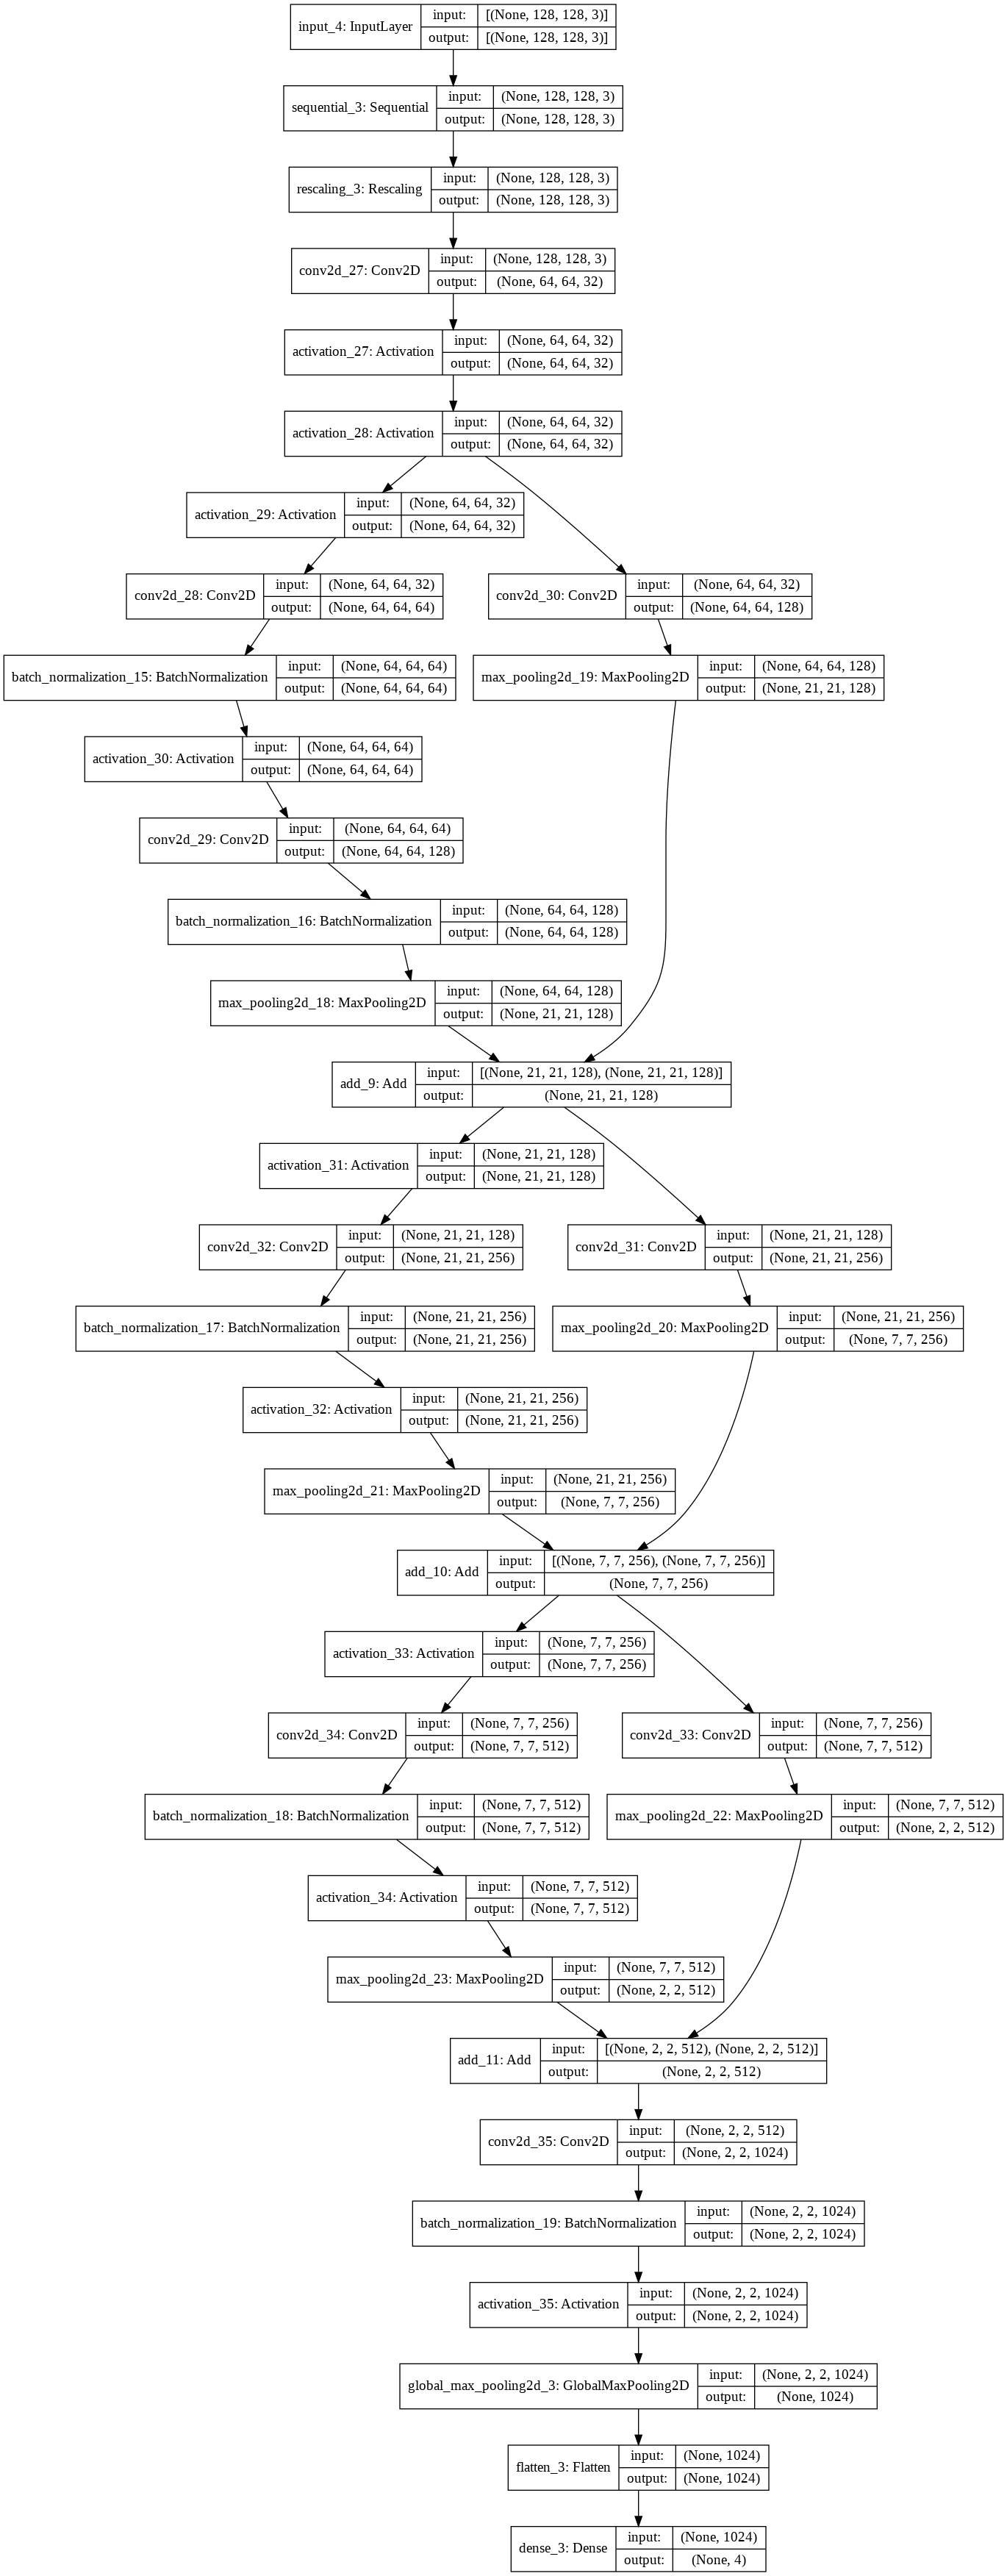

In [100]:
def Net ():
    inputs = keras.Input(shape=input_shape)
    dense_1 = data_augmentation(inputs)
    dense_1 = tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)(dense_1)
    dense_1 = layers.Conv2D(32, 3, strides=2, padding='same')(dense_1)
    dense_1 = layers.Activation('relu')(dense_1)
    dense_common_1 = layers.Activation('relu')(dense_1)

    dense_2 = layers.Activation('relu')(dense_common_1)
    dense_2 = layers.Conv2D(64, 3, padding='same')(dense_2)  
    dense_2 = layers.BatchNormalization()(dense_2)
    dense_2 = layers.Activation('relu')(dense_2)
    dense_2 = layers.Conv2D(128, 3, padding='same')(dense_2)
    dense_2 = layers.BatchNormalization()(dense_2)
    dense_2 = layers.MaxPooling2D(3)(dense_2)
    
    dense_3 = layers.Conv2D(128, 3, padding='same')(dense_common_1)
    # dense_3 = layers.BatchNormalization()(dense_3)
    # dense_3 = layers.Activation('relu')(dense_3)
    dense_3 = layers.MaxPooling2D(3)(dense_3)  
    
    
    dense_common_2 = layers.add([dense_2,dense_3])
    dense_true_1 = layers.Conv2D(256,3,padding='same')(dense_common_2)
    dense_true_1 = layers.MaxPooling2D(3)(dense_true_1)  

    dense_4 = layers.Activation('relu')(dense_common_2)
    dense_4 = layers.Conv2D(256,3,padding='same')(dense_4)
    dense_4 = layers.BatchNormalization()(dense_4)
    dense_4 = layers.Activation('relu')(dense_4)
    dense_4 = layers.MaxPooling2D(3)(dense_4)

    dense_common_3 = layers.add([dense_4,dense_true_1])
    dense_true_2 = layers.Conv2D(512, 3, padding='same')(dense_common_3)
    dense_true_2 = layers.MaxPooling2D(3)(dense_true_2)

    dense_5 = layers.Activation('relu')(dense_common_3)
    dense_5 = layers.Conv2D(512,3,padding='same')(dense_5)
    dense_5 = layers.BatchNormalization()(dense_5)
    dense_5 = layers.Activation('relu')(dense_5)
    dense_5 = layers.MaxPooling2D(3)(dense_5)

    dense_common_4 = layers.add([dense_5,dense_true_2])
    dense_6 = layers.Conv2D(1024,3,padding='same')(dense_common_4)
    dense_6 = layers.BatchNormalization()(dense_6)
    dense_6 = layers.Activation('relu')(dense_6)
    dense_6 = layers.GlobalMaxPooling2D()(dense_6)
    
    dense_6 = layers.Flatten()(dense_6)
#     dense_6 = layers.Dropout(0.5)(dense_6)
    outputs = layers.Dense(4, activation = 'softmax')(dense_6)
    return keras.Model(inputs, outputs)
model = Net()
keras.utils.plot_model(model, show_shapes=True)

In [101]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 128, 128, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
rescaling_3 (Rescaling)         (None, 128, 128, 3)  0           sequential_3[0][0]               
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 64, 64, 32)   896         rescaling_3[0][0]                
____________________________________________________________________________________________

In [102]:
history = HistoryCallback()
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", # по какому параметру будем останавливать
    patience=10, # сколько эпох подряд качество не должно улучшаться для остановки
    restore_best_weights=False # также можно восстанавливать лучшие веса после остановки (откатываться на 5 эпох назад)
)
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adam(learning_rate=0.001), 
              metrics='acc')

# Обучение модели

Epoch 1/100
38/38 [==============================] - 15s 300ms/step - loss: 1.3114 - acc: 0.5440 - val_loss: 2.1094 - val_acc: 0.2367
Epoch 2/100
38/38 [==============================] - 13s 289ms/step - loss: 0.8557 - acc: 0.6370 - val_loss: 1.9358 - val_acc: 0.2367
Epoch 3/100
38/38 [==============================] - 13s 296ms/step - loss: 0.9382 - acc: 0.6271 - val_loss: 2.1185 - val_acc: 0.2667
Epoch 4/100
38/38 [==============================] - 13s 291ms/step - loss: 0.8661 - acc: 0.6462 - val_loss: 1.7755 - val_acc: 0.3000
Epoch 5/100
38/38 [==============================] - 13s 296ms/step - loss: 0.7003 - acc: 0.7234 - val_loss: 2.2421 - val_acc: 0.2600
Epoch 6/100
38/38 [==============================] - 13s 294ms/step - loss: 0.7576 - acc: 0.6894 - val_loss: 2.2593 - val_acc: 0.3967
Epoch 7/100
38/38 [==============================] - 13s 295ms/step - loss: 0.6899 - acc: 0.7375 - val_loss: 1.9987 - val_acc: 0.4267
Epoch 8/100
38/38 [==============================] - 13s 288ms

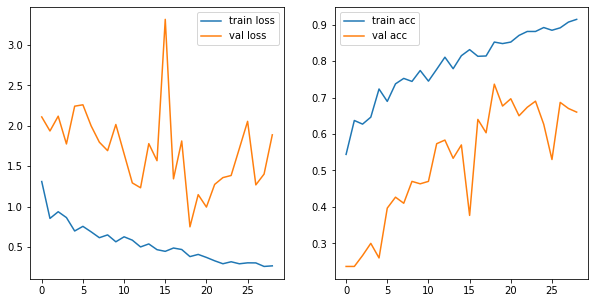

In [103]:
model.fit(train_ds, batch_size=batch_size, epochs=epochs, validation_data=val_ds, callbacks=[history, early_stopping],verbose=1,use_multiprocessing=True)

# Результаты

In [105]:
from keras.preprocessing import image

from google.colab import files
from io import BytesIO
from PIL import Image
# elephant
uploaded = files.upload()
test_image1 = Image.open(BytesIO(uploaded['072.jpg']))

Saving 072.jpg to 072 (1).jpg


In [107]:
# zebra
uploaded = files.upload()
test_image2 = Image.open(BytesIO(uploaded['248.jpg']))

Saving 248.jpg to 248 (1).jpg


In [146]:
# зебра из интернета
uploaded = files.upload()
test_image3 = Image.open(BytesIO(uploaded['13171.jpg']))

Saving 13171.jpg to 13171 (1).jpg


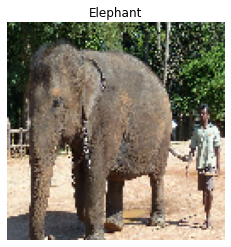

In [108]:
test_image1 = image.load_img('072.jpg', target_size=(128, 128))
plt.imshow(test_image1)
plt.axis('off')
plt.title('Elephant')
plt.show()

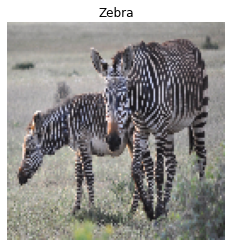

In [140]:
test_image2 = image.load_img('248.jpg', target_size=(128, 128))
plt.imshow(test_image2)
plt.axis('off')
plt.title('Zebra')
plt.show()

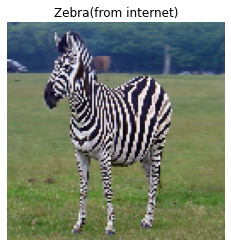

In [148]:
test_image3 = image.load_img('13171.jpg', target_size=(128, 128))
plt.imshow(test_image3)
plt.axis('off')
plt.title('Zebra(from internet)')
plt.show()

In [149]:
indices = {0: 'Буйвол', 1: 'Слон', 2: 'Носорог', 3: 'Зебра'}

In [151]:
import numpy as np
images = [test_image1, test_image2, test_image3]
result = []
for i in images:
  i=image.img_to_array(i)
  i=np.expand_dims(i, axis=0),
  result.append(model.predict(i).argmax(axis=1))
print(f'Первая картинка это {indices[result[0][0]]}, вторая картинка это {indices[result[1][0]]}, третья картинка это {indices[result[2][0]]}')



Первая картинка это Слон, вторая картинка это Зебра, третья картинка это Зебра
